#### 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 모든 행과 열을 확인하고 싶으면 다음의 주석을 해제하면 됩니다.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#### 데이터 불러오기

In [2]:
# 데이터 경로 지정
path_month_4 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/04월 서울시 교통량 조사자료(2022).xlsx"
path_month_5 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/05월 서울시 교통량 조사자료(2022).xlsx"

# 데이터 불러오기
df_month_4 = pd.read_excel(path_month_4, sheet_name="2022년 04월")
df_month_5 = pd.read_excel(path_month_5, sheet_name="2022년 05월")

#### 데이터 전처리

In [3]:
# 탐색 구간 지정

# 4월
df_month_4 = df_month_4.loc[((df_month_4["지점명"]=="한강대교") | 
                            (df_month_4["지점명"]=="동작대교") | 
                            (df_month_4["지점명"]=="반포대교") | 
                            (df_month_4["지점명"]=="한남대교") | 
                            (df_month_4["지점명"]=="잠수교")) &
                            (df_month_4["방향"]=="유입")]

# 5월
df_month_5 = df_month_5.loc[((df_month_5["지점명"]=="한강대교") | 
                            (df_month_5["지점명"]=="동작대교") | 
                            (df_month_5["지점명"]=="반포대교") | 
                            (df_month_5["지점명"]=="한남대교") | 
                            (df_month_5["지점명"]=="잠수교")) &
                            (df_month_5["방향"]=="유입")]

In [4]:
# 탐색 일자 지정
df_month_4 = df_month_4.loc[(df_month_4["일자"] > 20220419)]
df_month_5 = df_month_5.loc[(df_month_5["일자"] < 20220531)]

# 탐색 일자 내 공휴일 제거
df_month_5 = df_month_5[df_month_5["일자"] != 20220505] 

In [5]:
# 탐색 요일 지정
df_month_4 = df_month_4.loc[(df_month_4["요일"] != "토") & (df_month_4["요일"] != "일")]
df_month_5 = df_month_5.loc[(df_month_5["요일"] != "토") & (df_month_5["요일"] != "일")]

# 데이터 병합
data = pd.concat([df_month_4, df_month_5])

# 데이터 내 결측치: 기준 컬럼의 평균을 결측치에 대입하였습니다.
data[data["지점명"] == "한강대교"] = data[data["지점명"] == "한강대교"].fillna(data[data["지점명"] == "한강대교"].mean())
data[data["지점명"] == "동작대교"] = data[data["지점명"] == "동작대교"].fillna(data[data["지점명"] == "동작대교"].mean())

/var/folders/j4/g1ty5k8d2_gfwhz7k__s54sm0000gn/T/ipykernel_11384/3710312854.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["지점명"] == "한강대교"] = data[data["지점명"] == "한강대교"].fillna(data[data["지점명"] == "한강대교"].mean())
/var/folders/j4/g1ty5k8d2_gfwhz7k__s54sm0000gn/T/ipykernel_11384/3710312854.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["지점명"] == "동작대교"] = data[data["지점명"] == "동작대교"].fillna(data[data["지점명"] == "동작대교"].mean())


In [6]:
# 탐색 일자 구분: 대통령 취임 전과 후로 구분하였습니다.
df_month_5_before = df_month_5.loc[(df_month_5["일자"] < 20220511)]
df_month_5_after = df_month_5.loc[(df_month_5["일자"] > 20220510)]

In [7]:
# 탐색 구간 별 분석을 위하여 다음과 같이 분류하였습니다.

# 한강대교
hangang_month_4 = df_month_4[df_month_4["지점명"] == "한강대교"]
hangang_month_5 = df_month_5[df_month_5["지점명"] == "한강대교"]
hangang = pd.concat([hangang_month_4, hangang_month_5])

# 한강대교 - 탐색 시간 지정
hangang_month_4 = hangang_month_4[["일자", "요일", "지점명", "8시", "9시", "10시"]]
hangang_month_5 = hangang_month_5[["일자", "요일", "지점명", "8시", "9시", "10시"]]
hangang = hangang[["일자", "요일", "지점명", "8시", "9시", "10시"]]

# 한강대교 - 결측치: 기준 컬럼의 평균을 결측치에 대입하였습니다.
hangang_month_4.fillna(hangang_month_4.mean())
hangang_month_5.fillna(hangang_month_5.mean())
hangang = hangang.fillna(hangang.mean())

# 동작대교
dongjak_month_4 = df_month_4[df_month_4["지점명"] == "동작대교"]
dongjak_month_5 = df_month_5[df_month_5["지점명"] == "동작대교"]
dongjak = pd.concat([dongjak_month_4, dongjak_month_5])

# 동작대교 - 탐색 시간 지정
dongjak_month_4 = dongjak_month_4[["일자", "요일", "지점명", "8시", "9시", "10시"]]
dongjak_month_5 = dongjak_month_5[["일자", "요일", "지점명", "8시", "9시", "10시"]]
dongjak = dongjak[["일자", "요일", "지점명", "8시", "9시", "10시"]]

# 동작대교 - 결측치: 기준 컬럼의 평균을 결측치에 대입하였습니다.
dongjak_month_4.fillna(dongjak_month_4.mean())
dongjak_month_5.fillna(dongjak_month_5.mean())
dongjak = dongjak.fillna(dongjak.mean())

# 반포대교
banpo_month_4 = df_month_4[df_month_4["지점명"] == "반포대교"]
banpo_month_5 = df_month_5[df_month_5["지점명"] == "반포대교"]
banpo = pd.concat([banpo_month_4, banpo_month_5])

# 반포대교 - 탐색 시간 지정
banpo_month_4 = banpo_month_4[["일자", "요일", "지점명", "8시", "9시", "10시"]]
banpo_month_5 = banpo_month_5[["일자", "요일", "지점명", "8시", "9시", "10시"]]
banpo = banpo[["일자", "요일", "지점명", "8시", "9시", "10시"]]

# 한남대교
hannam_month_4 = df_month_4[df_month_4["지점명"] == "한남대교"]
hannam_month_5 = df_month_5[df_month_5["지점명"] == "한남대교"]
hannam = pd.concat([hannam_month_4, hannam_month_5])

# 한남대교 - 탐색 시간 지정
hannam_month_4 = hannam_month_4[["일자", "요일", "지점명", "8시", "9시", "10시"]]
hannam_month_5 = hannam_month_5[["일자", "요일", "지점명", "8시", "9시", "10시"]]
hannam = hannam[["일자", "요일", "지점명", "8시", "9시", "10시"]]

# 잠수교
jamsu_month_4 = df_month_4[df_month_4["지점명"] == "잠수교"]
jamsu_month_5 = df_month_5[df_month_5["지점명"] == "잠수교"]
jamsu = pd.concat([jamsu_month_4, jamsu_month_5])

# 잠수교 - 탐색 시간 지정
jamsu_month_4 = jamsu_month_4[["일자", "요일", "지점명", "8시", "9시", "10시"]]
jamsu_month_5 = jamsu_month_5[["일자", "요일", "지점명", "8시", "9시", "10시"]]
jamsu = jamsu[["일자", "요일", "지점명", "8시", "9시", "10시"]]

/var/folders/j4/g1ty5k8d2_gfwhz7k__s54sm0000gn/T/ipykernel_11384/2496528133.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hangang_month_4.fillna(hangang_month_4.mean())
/var/folders/j4/g1ty5k8d2_gfwhz7k__s54sm0000gn/T/ipykernel_11384/2496528133.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hangang_month_5.fillna(hangang_month_5.mean())
/var/folders/j4/g1ty5k8d2_gfwhz7k__s54sm0000gn/T/ipykernel_11384/2496528133.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hangang =

In [8]:
# 탐색 시간 지정
data = data[["일자", "요일", "지점명", "8시", "9시", "10시"]].sort_values(by="일자")
df_month_4 = df_month_4[["일자", "요일", "지점명", "8시", "9시", "10시"]].sort_values(by="일자")
df_month_5 = df_month_5[["일자", "요일", "지점명", "8시", "9시", "10시"]].sort_values(by="일자")

#### 결과 확인

In [9]:
# 전체 데이터의 결과 수치 확인
print(df_month_4[["8시", "9시", "10시"]].mean())
print(df_month_5[["8시", "9시", "10시"]].mean())
print(data[["8시", "9시", "10시"]].mean())

8시     3064.025641
9시     2643.871795
10시    2486.820513
dtype: float64
8시     2986.912088
9시     2667.450549
10시    2516.219780
dtype: float64
8시     3005.996264
9시     2664.778242
10시    2514.482418
dtype: float64


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


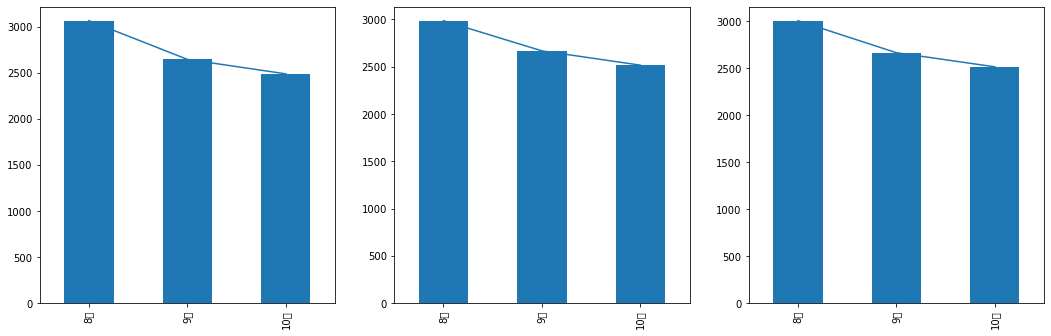

In [10]:
# 전체 데이터의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(df_month_4[["8시", "9시", "10시"]].mean())
print(df_month_4[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(df_month_5[["8시", "9시", "10시"]].mean())
print(df_month_5[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(data[["8시", "9시", "10시"]].mean())
print(data[["8시", "9시", "10시"]].mean().plot.bar())

In [11]:
# 한강대교의 결과 수치 확인
print(hangang_month_4[["8시", "9시", "10시"]].mean())
print(hangang_month_5[["8시", "9시", "10시"]].mean())
print(hangang[["8시", "9시", "10시"]].mean())

8시     3247.500
9시     2966.875
10시    2892.125
dtype: float64
8시     3055.500000
9시     2994.750000
10시    2873.166667
dtype: float64
8시     3132.30
9시     2983.60
10시    2880.75
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


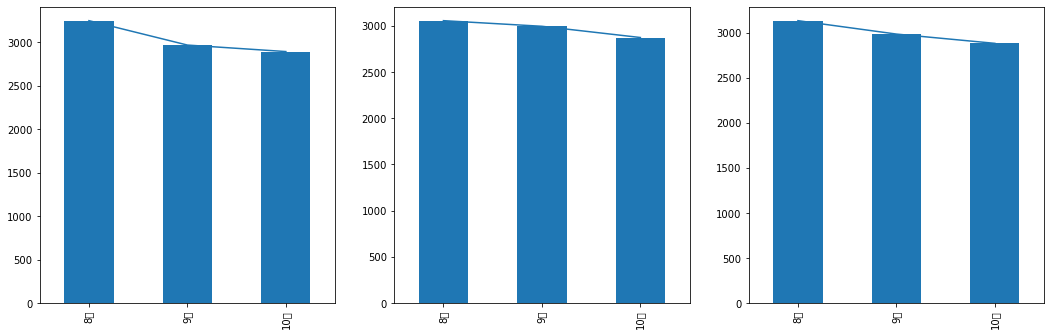

In [12]:
# 한강대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hangang_month_4[["8시", "9시", "10시"]].mean())
print(hangang_month_4[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(hangang_month_5[["8시", "9시", "10시"]].mean())
print(hangang_month_5[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(hangang[["8시", "9시", "10시"]].mean())
print(hangang[["8시", "9시", "10시"]].mean().plot.bar())

In [13]:
# 동작대교의 결과 수치 확인
print(dongjak_month_4[["8시", "9시", "10시"]].mean())
print(dongjak_month_5[["8시", "9시", "10시"]].mean())
print(dongjak[["8시", "9시", "10시"]].mean())

8시     2247.714286
9시     1604.142857
10시    1451.571429
dtype: float64
8시     2233.789474
9시     1701.894737
10시    1531.210526
dtype: float64
8시     2237.538462
9시     1675.576923
10시    1509.769231
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


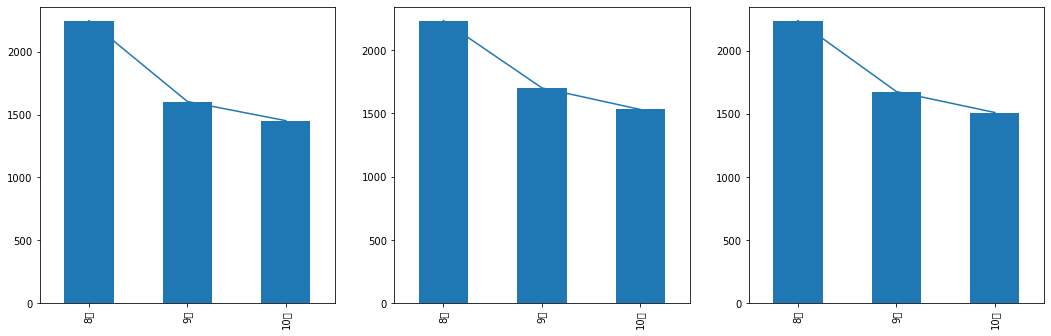

In [14]:
# 동작대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(dongjak_month_4[["8시", "9시", "10시"]].mean())
print(dongjak_month_4[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(dongjak_month_5[["8시", "9시", "10시"]].mean())
print(dongjak_month_5[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(dongjak[["8시", "9시", "10시"]].mean())
print(dongjak[["8시", "9시", "10시"]].mean().plot.bar())

In [15]:
# 반포대교의 결과 수치 확인
print(banpo_month_4[["8시", "9시", "10시"]].mean())
print(banpo_month_5[["8시", "9시", "10시"]].mean())
print(banpo[["8시", "9시", "10시"]].mean())

8시     3603.125
9시     3137.000
10시    2920.500
dtype: float64
8시     3608.45
9시     3218.35
10시    2946.00
dtype: float64
8시     3606.928571
9시     3195.107143
10시    2938.714286
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


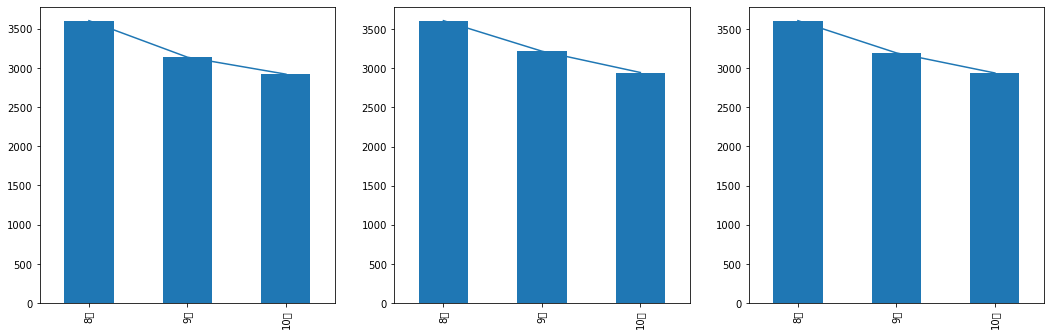

In [16]:
# 반포대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(banpo_month_4[["8시", "9시", "10시"]].mean())
print(banpo_month_4[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(banpo_month_5[["8시", "9시", "10시"]].mean())
print(banpo_month_5[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(banpo[["8시", "9시", "10시"]].mean())
print(banpo[["8시", "9시", "10시"]].mean().plot.bar())

In [17]:
# 한남대교의 결과 확인
print(hannam_month_4[["8시", "9시", "10시"]].mean())
print(hannam_month_5[["8시", "9시", "10시"]].mean())
print(hannam[["8시", "9시", "10시"]].mean())

8시     5612.750
9시     4949.125
10시    4596.375
dtype: float64
8시     5505.40
9시     5063.75
10시    4845.10
dtype: float64
8시     5536.071429
9시     5031.000000
10시    4774.035714
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


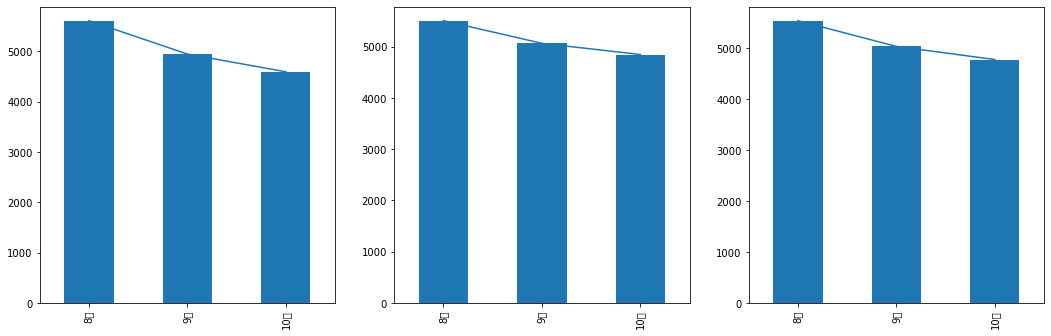

In [18]:
# 한남대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hannam_month_4[["8시", "9시", "10시"]].mean())
print(hannam_month_4[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(hannam_month_5[["8시", "9시", "10시"]].mean())
print(hannam_month_5[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(hannam[["8시", "9시", "10시"]].mean())
print(hannam[["8시", "9시", "10시"]].mean().plot.bar())

In [19]:
# 잠수교의 결과 확인
print(jamsu_month_4[["8시", "9시", "10시"]].mean())
print(jamsu_month_5[["8시", "9시", "10시"]].mean())
print(jamsu[["8시", "9시", "10시"]].mean())

8시     507.000
9시     432.250
10시    444.125
dtype: float64
8시     521.20
9시     441.15
10시    479.15
dtype: float64
8시     517.142857
9시     438.607143
10시    469.142857
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


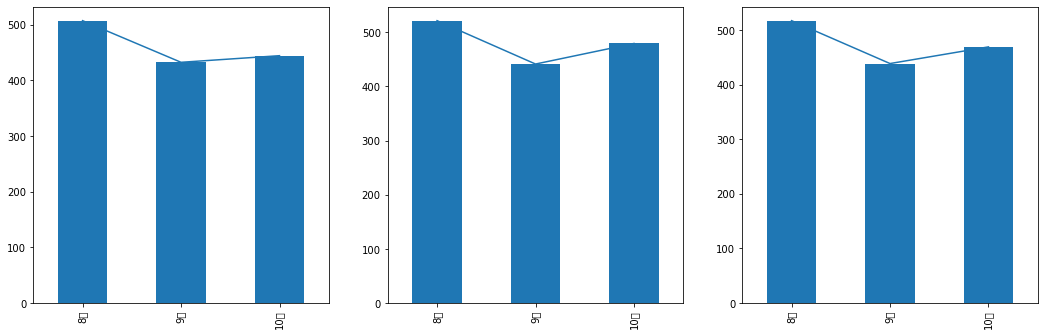

In [20]:
# 잠수교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(jamsu_month_4[["8시", "9시", "10시"]].mean())
print(jamsu_month_4[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(232)
plt.plot(jamsu_month_5[["8시", "9시", "10시"]].mean())
print(jamsu_month_5[["8시", "9시", "10시"]].mean().plot.bar())
plt.subplot(233)
plt.plot(jamsu[["8시", "9시", "10시"]].mean())
print(jamsu[["8시", "9시", "10시"]].mean().plot.bar())

#### 데이터 내보내기

In [21]:
df_month_4.to_csv("./volume/before.csv")
df_month_5.to_csv("./volume/after.csv")
data.to_csv("./volume/data.csv")
hangang.to_csv("./volume/hangang.csv")
dongjak.to_csv("./volume/dongjak.csv")
banpo.to_csv("./volume/banpo.csv")
hannam.to_csv("./volume/hannam.csv")
jamsu.to_csv("./volume/jamsu.csv")